In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_data = credit_card_data.dropna(how='any')

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,...,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000
mean,10120.112736,-0.235197,0.283888,0.846226,0.302903,-0.118679,0.128047,-0.157336,-0.016176,0.989459,...,-0.067941,-0.157402,-0.035600,0.011196,0.116957,0.035549,0.012711,0.002134,63.882442,0.004013
std,7738.910946,1.719446,1.394057,1.561289,1.500572,1.289526,1.320437,1.238618,1.262065,1.213306,...,0.873900,0.621813,0.499822,0.587229,0.427905,0.558309,0.399463,0.255715,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.000000,-0.969733,-0.282744,0.407423,-0.623017,-0.717075,-0.624048,-0.616472,-0.182281,0.288101,...,-0.271770,-0.549720,-0.173814,-0.339656,-0.135903,-0.374626,-0.076862,-0.014862,5.490000,0.000000
50%,9086.000000,-0.319405,0.252845,0.961015,0.220137,-0.191573,-0.144198,-0.112094,0.016904,0.971387,...,-0.132302,-0.122777,-0.045042,0.060208,0.155162,-0.035782,-0.000968,0.016243,15.690000,0.000000
75%,17099.000000,1.162666,0.884662,1.607069,1.199038,0.351314,0.508506,0.421843,0.265522,1.654173,...,0.018685,0.228997,0.069744,0.392750,0.393032,0.375313,0.098500,0.072503,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
credit_card_data['Class'].value_counts()

0.0    13897
1.0       56
Name: Class, dtype: int64

In [ ]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(13897, 31)
(56, 31)


In [ ]:
legit.Amount.describe()

count    13897.000000
mean        63.773909
std        177.164503
min          0.000000
25%          5.770000
50%         15.900000
75%         52.370000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.481255,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,...,0.020758,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


In [ ]:
legit_sample = legit.sample(n=56)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12968,22789,-0.148352,1.196671,0.878450,1.618351,0.168956,-0.052501,0.297526,-0.182895,0.698625,...,0.197041,0.792259,0.053496,-0.051159,-1.175563,-0.341214,-0.136142,0.246099,6.99,0.0
9182,13131,0.847527,-1.434972,1.136326,-0.137139,-1.589328,0.357024,-1.150473,0.159075,1.213023,...,0.354857,0.917770,-0.167838,0.082828,0.147878,-0.066320,0.014155,0.050766,218.00,0.0
12057,20887,0.898614,0.033896,-0.083297,1.256326,0.554091,0.702342,0.155668,0.196360,1.160759,...,0.031511,0.278743,-0.027337,-0.708803,0.393032,-0.231545,0.011633,0.005579,89.99,0.0
1091,841,1.164945,0.592334,0.193037,2.435468,0.025090,-0.673958,0.372624,-0.067041,-1.105574,...,0.035016,-0.034603,-0.076878,0.494131,0.621421,0.043292,-0.053444,-0.000716,6.10,0.0
11084,19156,-0.734818,0.294227,2.542738,-1.937339,-0.012422,0.299249,0.200708,0.085501,2.381841,...,-0.102813,0.227980,-0.384521,-0.366140,0.393166,-0.808422,-0.074573,-0.169413,11.85,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.0,1.0
12108,21046,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.0,1.0
12261,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0,1.0
12369,21662,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.0,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    56
1.0    56
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,9632.017857,-0.018164,0.256792,1.183438,0.383969,-0.233205,0.026939,-0.013975,-0.006847,0.900636,...,0.022575,-0.159162,-0.143795,-0.030304,0.087618,0.056584,0.162886,0.056301,0.008047,57.865179
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
print(X)

        Time         V1         V2         V3         V4         V5        V6  \
12968  22789  -0.148352   1.196671   0.878450   1.618351   0.168956 -0.052501   
9182   13131   0.847527  -1.434972   1.136326  -0.137139  -1.589328  0.357024   
12057  20887   0.898614   0.033896  -0.083297   1.256326   0.554091  0.702342   
1091     841   1.164945   0.592334   0.193037   2.435468   0.025090 -0.673958   
11084  19156  -0.734818   0.294227   2.542738  -1.937339  -0.012422  0.299249   
...      ...        ...        ...        ...        ...        ...       ...   
11880  20451 -15.819179   8.775997 -22.804686  11.864868  -9.092361 -2.386893   
12070  20931 -16.367923   9.223692 -23.270631  11.844777  -9.462037 -2.450444   
12108  21046 -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
12261  21419 -17.467710  10.114816 -24.202142  11.805469 -10.198046 -2.579938   
12369  21662 -18.018561  10.558600 -24.667741  11.786180 -10.564657 -2.645681   

              V7        V8 

In [ ]:
print(y)

12968    0.0
9182     0.0
12057    0.0
1091     0.0
11084    0.0
        ... 
11880    1.0
12070    1.0
12108    1.0
12261    1.0
12369    1.0
Name: Class, Length: 112, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(112, 30) (89, 30) (23, 30)


In [ ]:
creditcard_classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
creditcard_classifier.fit(X_train , y_train )

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [ ]:
y_predicted = creditcard_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicted)*100

86.95652173913044

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[10,  2],
       [ 1, 10]])

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9887640449438202


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9565217391304348


In [ ]:
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))

56.0
44.0
12.0


In [ ]:
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#think how to use this
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc ,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

#improve
import warnings
warnings.filterwarnings("ignore")

Class
0.0    99.598653
1.0     0.401347
Name: Class, dtype: float64


<Axes: ylabel='Class'>

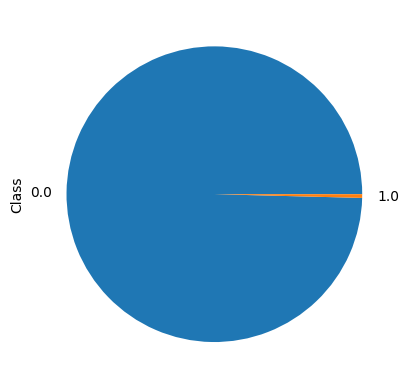

In [ ]:
#checking the class distrubuition of usable var and there graph
print((credit_card_data.groupby('Class')['Class'].count()/credit_card_data['Class'].count()) *100)
((credit_card_data.groupby('Class')['Class'].count()/credit_card_data['Class'].count()) *100).plot.pie()

In [ ]:
classes=credit_card_data['Class'].value_counts()
legit = classes[0]/credit_card_data['Class'].count()*100
fraud = classes[1]/credit_card_data['Class'].count()*100

print(legit)
print(fraud)

99.59865261950836
0.40134738049165053


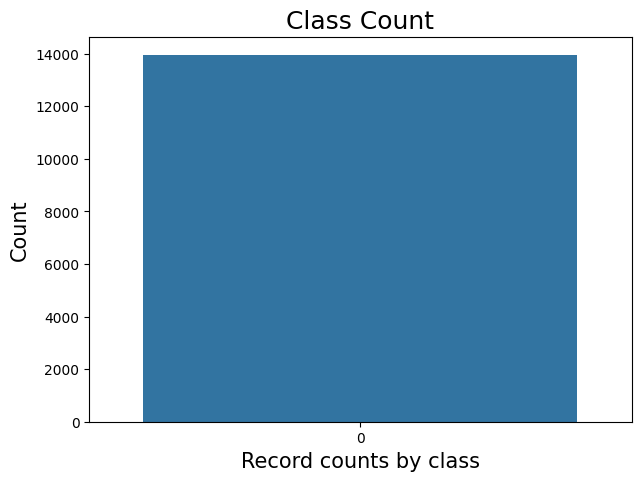

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(credit_card_data['Class'])
plt.title("Class Count", fontsize= 18)
plt.xlabel("Record counts by class" , fontsize = 15 )
plt.ylabel("Count", fontsize = 15)
plt.show()

In [ ]:
#for correlation check
corr = credit_card_data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.016829,0.000606,-0.043862,0.084256,-0.091414,-0.021174,-0.139961,0.051842,0.390075,...,-0.034331,-0.007816,-0.001976,-0.033069,0.089253,-0.044655,-0.004066,-0.000494,0.000229,0.017571
V1,0.016829,1.000000,-0.247332,0.232824,-0.081646,0.004149,0.099402,0.199335,0.028541,0.014148,...,-0.110814,0.012147,-0.092637,-0.007816,0.219951,-0.000390,-0.154937,0.082688,-0.171123,-0.165872
V2,0.000606,-0.247332,1.000000,-0.323329,0.140524,-0.198069,-0.017395,-0.034632,-0.037732,-0.142883,...,0.119161,-0.142756,0.012897,-0.029448,-0.132618,-0.053885,0.093910,-0.036089,-0.418877,0.199297
V3,-0.043862,0.232824,-0.323329,1.000000,-0.178807,0.229191,0.003076,0.435236,-0.199504,0.228914,...,-0.014826,0.221783,-0.001760,0.026934,-0.139522,0.037231,-0.202436,-0.009228,-0.117746,-0.413704
V4,0.084256,-0.081646,0.140524,-0.178807,1.000000,-0.132851,-0.038916,-0.202727,0.084832,-0.238452,...,-0.014357,-0.008679,0.004941,-0.048164,-0.063590,0.076153,0.052962,-0.007085,0.117863,0.274160
V5,-0.091414,0.004149,-0.198069,0.229191,-0.132851,1.000000,0.156373,0.096902,-0.053262,-0.015945,...,-0.052800,-0.100336,-0.021018,0.019154,-0.033120,-0.056659,-0.058553,-0.083351,-0.338492,-0.136448
V6,-0.021174,0.099402,-0.017395,0.003076,-0.038916,0.156373,1.000000,0.059900,-0.047072,0.018725,...,0.071995,-0.045444,0.012387,0.029572,0.069979,-0.015911,-0.079238,-0.007777,0.210044,-0.103768
V7,-0.139961,0.199335,-0.034632,0.435236,-0.202727,0.096902,0.059900,1.000000,-0.020333,0.054023,...,-0.138672,0.052695,0.048771,0.006757,-0.075102,-0.056251,-0.211111,-0.018163,0.256567,-0.329090
V8,0.051842,0.028541,-0.037732,-0.199504,0.084832,-0.053262,-0.047072,-0.020333,1.000000,-0.090015,...,-0.335488,0.145493,-0.079077,0.020574,0.011990,-0.001800,0.059917,0.067879,-0.057863,0.052541
V9,0.390075,0.014148,-0.142883,0.228914,-0.238452,-0.015945,0.018725,0.054023,-0.090015,1.000000,...,-0.008910,0.037847,-0.005346,0.008119,0.173129,0.001951,-0.062789,-0.058446,-0.014469,-0.207764


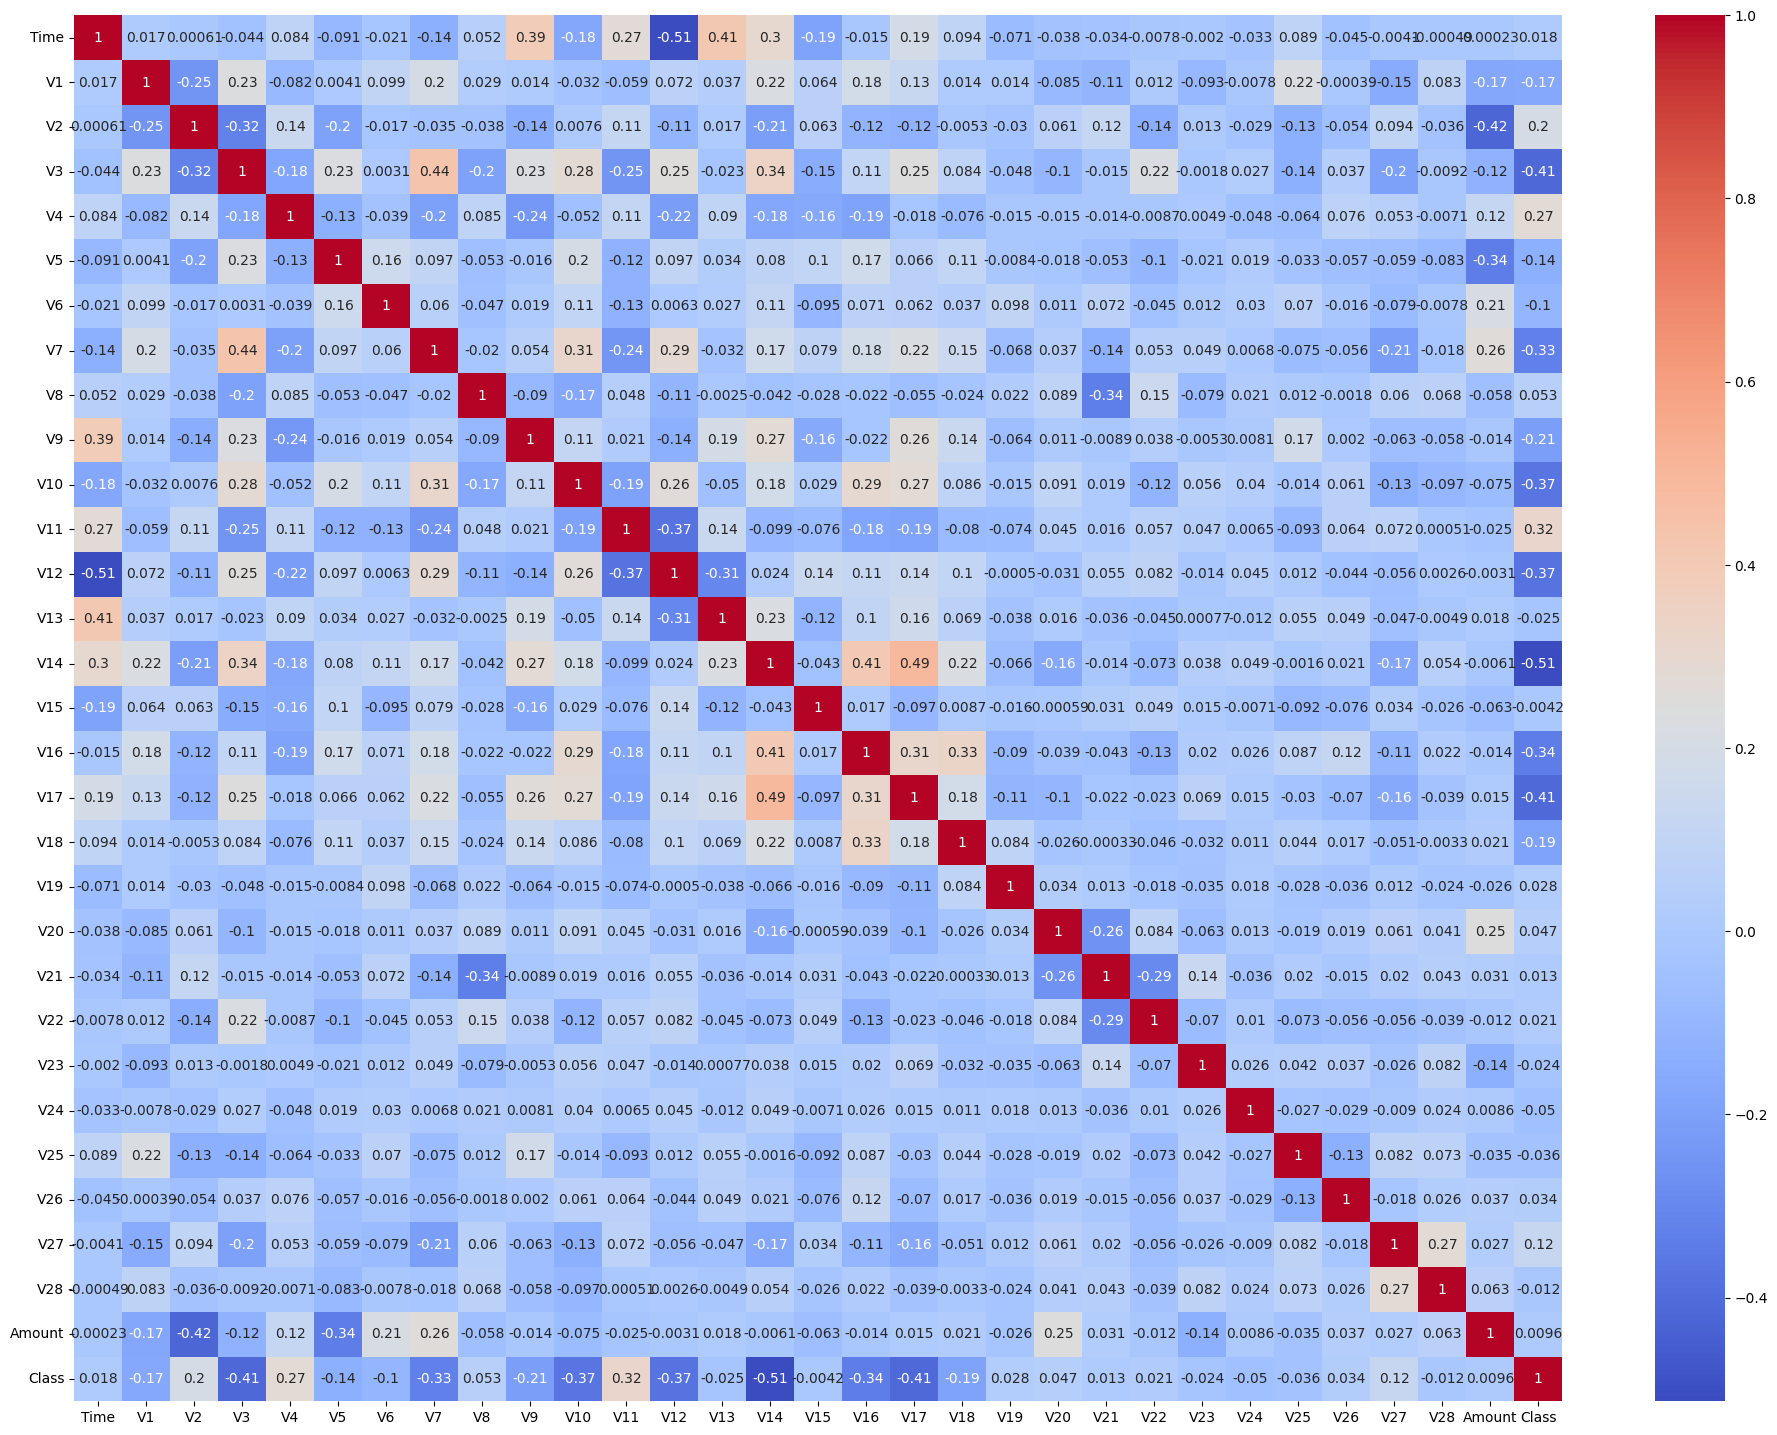

In [ ]:
#check corr in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot = True)
plt.show()

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.481255,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,...,0.020758,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


In [ ]:
cols = list(X.columns.values)

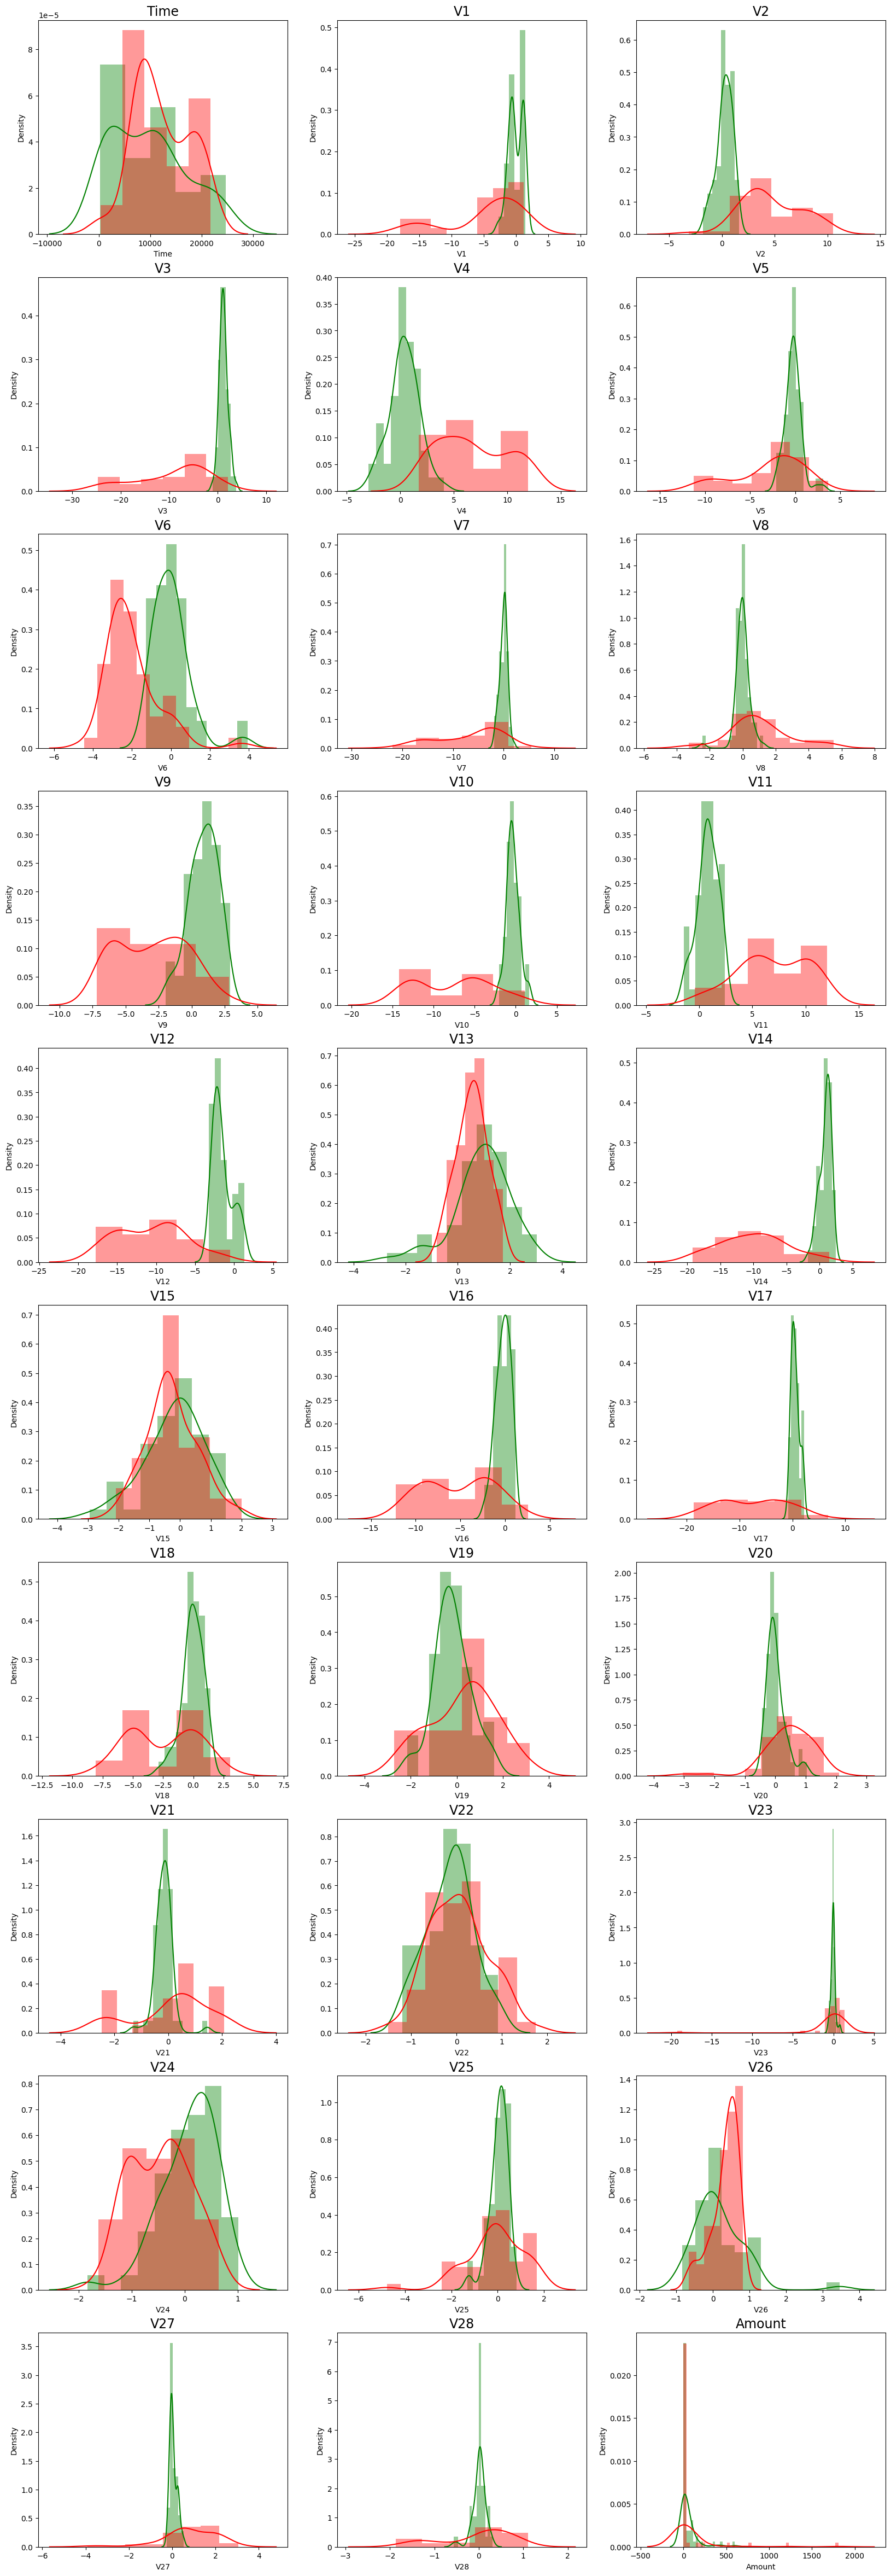

In [ ]:
#plot histogram of a var from the dataset to see the skewness
normal = credit_card_data.Class == 0
fraud = credit_card_data.Class == 1

plt.figure(figsize=(20,60))
for i , col in enumerate(cols):
  plt.subplot(10,3,i+1)
  sns.distplot(X[col][normal], color='green')
  sns.distplot(X[col][fraud], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
X_train_scaled

array([[-0.36134836,  0.34671742, -0.37139548, ..., -0.1631363 ,
         0.3240275 , -0.2591284 ],
       [-1.41658388,  0.37261161, -0.47928573, ..., -0.49369784,
        -0.14038779, -0.29592277],
       [ 0.76607424, -0.46459652,  0.14695769, ..., -4.32591745,
        -1.12687656, -0.25277452],
       ...,
       [-0.30857917,  0.74380867, -0.81698854, ..., -0.45620606,
         0.03846307, -0.29999258],
       [ 0.06391794,  0.06026683,  1.16297692, ...,  1.65655309,
         1.93225999, -0.29592277],
       [ 0.03056662,  0.75097071, -0.71733871, ..., -0.49040472,
         0.06313847, -0.22951849]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim = 30))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3)                 93        
                                                                 
 dense_17 (Dense)            (None, 3)                 12        
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100, validation_split =0.2)

Epoch 1/100
3/3 [==============================] - 1s 94ms/step - loss: 1.4650 - accuracy: 0.5070 - val_loss: 1.2336 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.4047 - accuracy: 0.5070 - val_loss: 1.1904 - val_accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 1.3475 - accuracy: 0.5211 - val_loss: 1.1484 - val_accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 1.2934 - accuracy: 0.5211 - val_loss: 1.1094 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 1.2436 - accuracy: 0.5070 - val_loss: 1.0725 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1918 - accuracy: 0.5211 - val_loss: 1.0370 - val_accuracy: 0.7778
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 1.1465 - accuracy: 0.5211 - val_loss: 1.0029 - val_accuracy: 0.7778
Epoch 8/100
3/3 [===

In [ ]:
model.layers[0].get_weights()

[array([[-0.24240346,  0.46246117, -0.33421984],
        [ 0.2941697 , -0.11863723, -0.13112572],
        [-0.23276973,  0.32981426,  0.4855504 ],
        [-0.40167317, -0.49742946,  0.089515  ],
        [ 0.43109715,  0.50797504, -0.19644539],
        [ 0.08761729, -0.01403086, -0.17869978],
        [ 0.16421568, -0.49941486,  0.1252356 ],
        [ 0.27207837, -0.08095589,  0.24615826],
        [ 0.16777414, -0.06181983,  0.25226   ],
        [-0.0259693 , -0.11172284, -0.26999393],
        [-0.02351878, -0.31774947, -0.16955975],
        [-0.23845714,  0.44556192, -0.03930225],
        [-0.4557902 , -0.41780534, -0.21519725],
        [ 0.10356393, -0.2628982 ,  0.1339718 ],
        [ 0.28257135, -0.22503074,  0.00589197],
        [-0.26459628, -0.26617792, -0.17958157],
        [-0.16255343, -0.12516941, -0.02458933],
        [-0.54973626,  0.32578966, -0.44176367],
        [-0.19547406,  0.1565742 , -0.0236126 ],
        [ 0.22056471,  0.23700328, -0.09189893],
        [ 0.37821832

In [ ]:
model.layers[1].get_weights()

[array([[ 0.12951459,  0.9066058 , -0.2185532 ],
        [-0.759     , -0.1352459 ,  0.7017788 ],
        [ 0.6825789 ,  0.7507828 ,  0.1620356 ]], dtype=float32),
 array([-9.99292433e-02, -1.03150025e-01,  6.20564388e-05], dtype=float32)]

In [ ]:
y_log = model.predict(X_test_scaled)

1/1 [==============================] - 0s 63ms/step


In [ ]:
y_log_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_log_pred)

0.8695652173913043

In [ ]:
import matplotlib.pyplot as plt


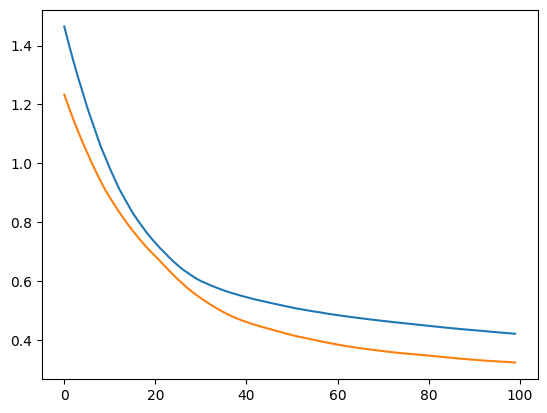

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

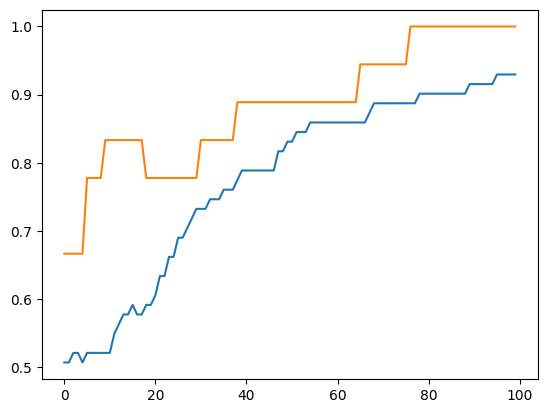

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])